In [15]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

Load data and caculate the number of property for sale with different built_year

In [273]:
df = pd.read_csv("../data/train.csv")
df = df.loc[df['built_year'].notnull()]
# Count the number of different built_year
dict= df.groupby(['built_year'])['listing_id'].count().to_dict()
df['count'] = df['built_year'].map(dict)

Set target planning_area

In [274]:
#Set planning_area we are going to prodict
target='clementi'
df=df.loc[df['planning_area']==target]

Data normalization

In [275]:
df = df[['built_year','count']].rename(columns = {"built_year":"ds","count":"y"})
df.drop_duplicates(inplace=True)
df['ds'] = pd.to_datetime(df['ds'],format="%Y") #transfer the built_year into standard time
df.head()

,ds,y
74,2013-01-01,463
128,2024-01-01,1476
133,1978-01-01,146
182,2025-01-01,1534
197,1985-01-01,381


Predict

In [361]:
m = Prophet(changepoint_prior_scale=0.8, interval_width=0.3,yearly_seasonality=15)
m.fit(df)

15:56:51 - cmdstanpy - INFO - Chain [1] start processing
15:56:52 - cmdstanpy - INFO - Chain [1] done processing


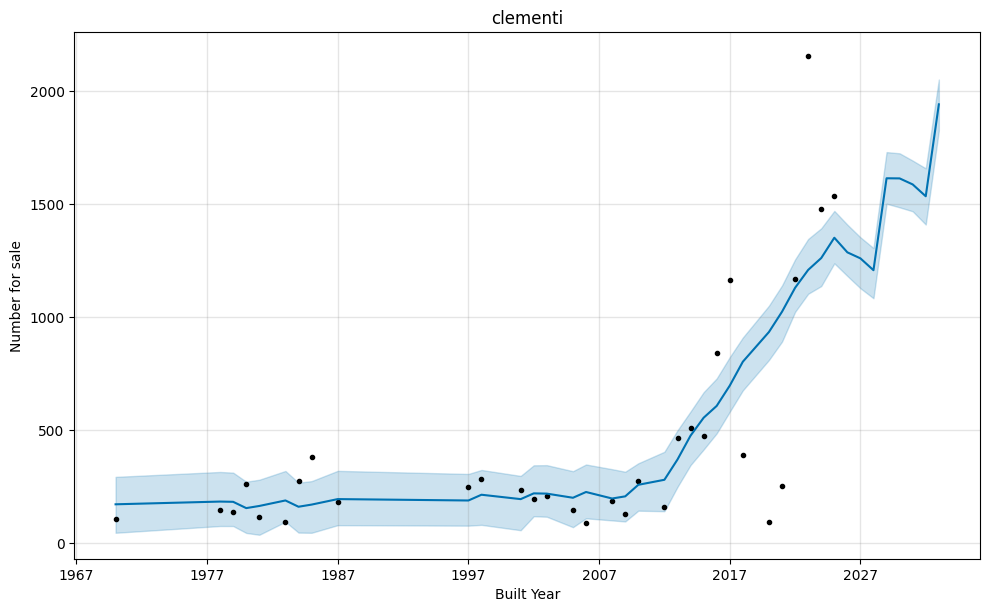

In [365]:
future = m.make_future_dataframe(periods=8, freq='Y') # range of prediction
prediction = m.predict(future)
# prediction['yhat_lower']=0 # restric the minmum of predict
# prediction['yhat'].loc[prediction['yhat']<0]=0
# Format the chart
m.plot(prediction)
plt.title(target)
plt.xlabel("Built Year")
plt.ylabel("Number for sale")
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()